# Unterscheidung aller Filter mithilfe Keras-Sequential-Modell

## Import der notwendigen Pakete

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# %matplotlib inline

## GPU-Test 

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available", len(physical_devices))

Num GPUs Available 1


## Import des Datasets

Das Datenset FACD_image umfasst 23 Ordner die jeweils 1280 Bilder enthalten, die mit dem gleichen Gimp-Filter bearbeitet wurden. Über den ImageDataGenerator und den Directory können die Bilder bereits beim Laden entsprechend vorbearbeitet werden. Hierfür wird werden die Bilder auf eine größe von 224x224 Skaliert und als in Graustufen eingefärbt.

In [3]:
# path to dataset
directory = "./FACD_image"
target_size = (224,224)
seed = 42;
batch_size=100

# create a image generator for keras, that can load images batchwise
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


train_batches = tf.keras.preprocessing.image.DirectoryIterator(
    directory, data_generator, target_size=target_size, color_mode='grayscale', batch_size=batch_size, shuffle=True, seed=seed,
    subset='training'
)

valid_batches = tf.keras.preprocessing.image.DirectoryIterator(
    directory, data_generator, target_size=target_size,  color_mode='grayscale', batch_size=batch_size, shuffle=True, seed=seed, 
    subset='validation'
)    

Found 23552 images belonging to 23 classes.
Found 5888 images belonging to 23 classes.


## Erstellung des Modells

Als Modell wird das Sequential Modell von Keras verwendet. 

In [4]:
#Definition des Modells
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,1)), 
    MaxPool2D(pool_size=(2, 2), strides=2), 
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'), 
    MaxPool2D(pool_size=(2,2), strides=2), 
    Flatten(), 
    Dense(units=23, activation='softmax'),
])

#Ausgeben einer Zusammenfassung 
model.summary()


#Compilieren und fürs Trainieren Vorbereiten
metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 23)                4616215   
Total params: 4,635,031
Trainable params: 4,635,031
Non-trainable params: 0
______________________________________________

## Trainieren des Modells 

In [5]:
epochs = 20
validation_freq = 1
filepath = "./keras_all_filters_grayscale_few_layer_highBatchSize.hdf5"

es=tf.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0.001, patience=0, verbose=0, mode='min',
    baseline=None, restore_best_weights=False
)

mc=tf.keras.callbacks.ModelCheckpoint(
    filepath, monitor='loss', verbose=0, save_best_only=False,
    save_weights_only=False, mode='auto', save_freq='epoch'
)

history = model.fit(
    x=train_batches, 
    validation_data=valid_batches, 
    epochs=epochs, 
    steps_per_epoch=len(train_batches), 
    validation_freq=validation_freq,
    verbose=1, 
    workers=4,
    callbacks=[es, mc]
)

C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 236 steps, validate for 59 steps
Epoch 1/20


C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


144/236 [=================>............] - ETA: 52s - loss: 45.1048 - categorical_accuracy: 0.0926 - precision: 0.0954 - recall: 0.0835- ETA: 59s - loss: 48.5643 - categorical_accuracy: 0.0916 - precision: 0.0938 - rec

C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19273 bytes but only got 816. Skipping tag 700
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5140 bytes but only got 816. Skipping tag 34377
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\Dennis\anaconda3\envs\ML\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3144 bytes but only got 816. Skipping tag 34675
  " Skipping tag %s" % (size, len(data), tag)


236/236 [==============================] - 241s 1s/step - loss: 29.6489 - categorical_accuracy: 0.1035 - precision: 0.1092 - recall: 0.0826 - val_loss: 4.3780 - val_categorical_accuracy: 0.1306 - val_precision: 0.1699 - val_recall: 0.0763
Epoch 2/20
236/236 [==============================] - 230s 976ms/step - loss: 3.3356 - categorical_accuracy: 0.1425 - precision: 0.2719 - recall: 0.0519 - val_loss: 2.8921 - val_categorical_accuracy: 0.1573 - val_precision: 0.4779 - val_recall: 0.0440
Epoch 3/20
236/236 [==============================] - 228s 966ms/step - loss: 2.7875 - categorical_accuracy: 0.1763 - precision: 0.5675 - recall: 0.0469 - val_loss: 2.7065 - val_categorical_accuracy: 0.1853 - val_precision: 0.6455 - val_recall: 0.0482
Epoch 4/20
236/236 [==============================] - 226s 956ms/step - loss: 2.6544 - categorical_accuracy: 0.1982 - precision: 0.6537 - recall: 0.0487 - val_loss: 2.6199 - val_categorical_accuracy: 0.1931 - val_precision: 0.7026 - val_recall: 0.0510
Epoch

## Plotten der Lern und Fehlerkurve

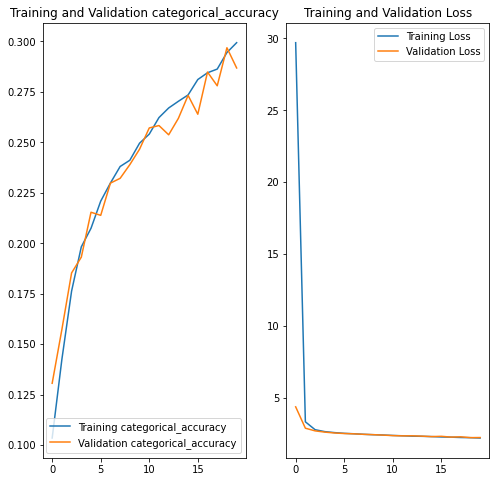

In [6]:
import plot

plot.plot_keras_history(history, len(history.epoch), metrics[0].name)

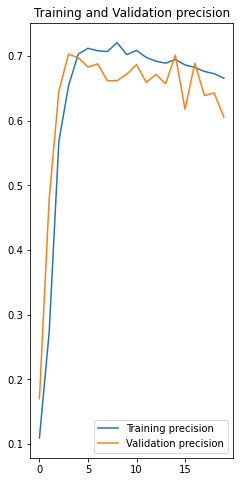

In [7]:
plot.plot_keras_history(history, len(history.epoch), metrics[1].name)

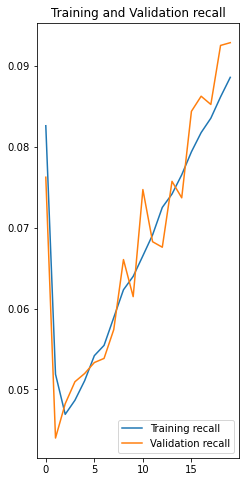

In [8]:
plot.plot_keras_history(history, len(history.epoch), metrics[2].name)